In [ ]:
from dags.settings.config import host, database, user, password, port

In [3]:
import psycopg2
import pandas as pd

# Configura los parámetros de conexión
conn_params = {
    'dbname': database,
    'user': user,
    'password': password,
    'host': host,
    'port': port
}

# Establece la conexión
conn = psycopg2.connect(**conn_params)

# Crea un DataFrame con los datos de la tabla orders_created
query = "SELECT * FROM orders_created"
df_orders = pd.read_sql_query(query, conn)

# Cierra la conexión
conn.close()


/tmp/ipykernel_67788/1342465450.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_orders = pd.read_sql_query(query, conn)


In [4]:
df_orders.columns

Index(['id', 'timestamp', 'order_type', 'price_taken', 'order_amount',
       'algo_strategy', 'order_executed'],
      dtype='object')

In [5]:
df_orders.tail()

,id,timestamp,order_type,price_taken,order_amount,algo_strategy,order_executed
702,703,2024-08-14 11:40:21.500902,SHORT,61268.5,0.000163,CNN Bybit 2,False
703,704,2024-08-14 11:50:20.324687,SHORT,61354.5,0.000163,CNN Bybit 3,False
704,705,2024-08-14 12:00:23.452713,None,61287.0,0.000000,CNN Bybit,None
705,706,2024-08-14 12:10:22.147385,SHORT,61337.5,0.000163,CNN Bybit 2,False
706,707,2024-08-14 12:20:27.582059,SHORT,61370.5,0.000163,CNN Bybit 3,False


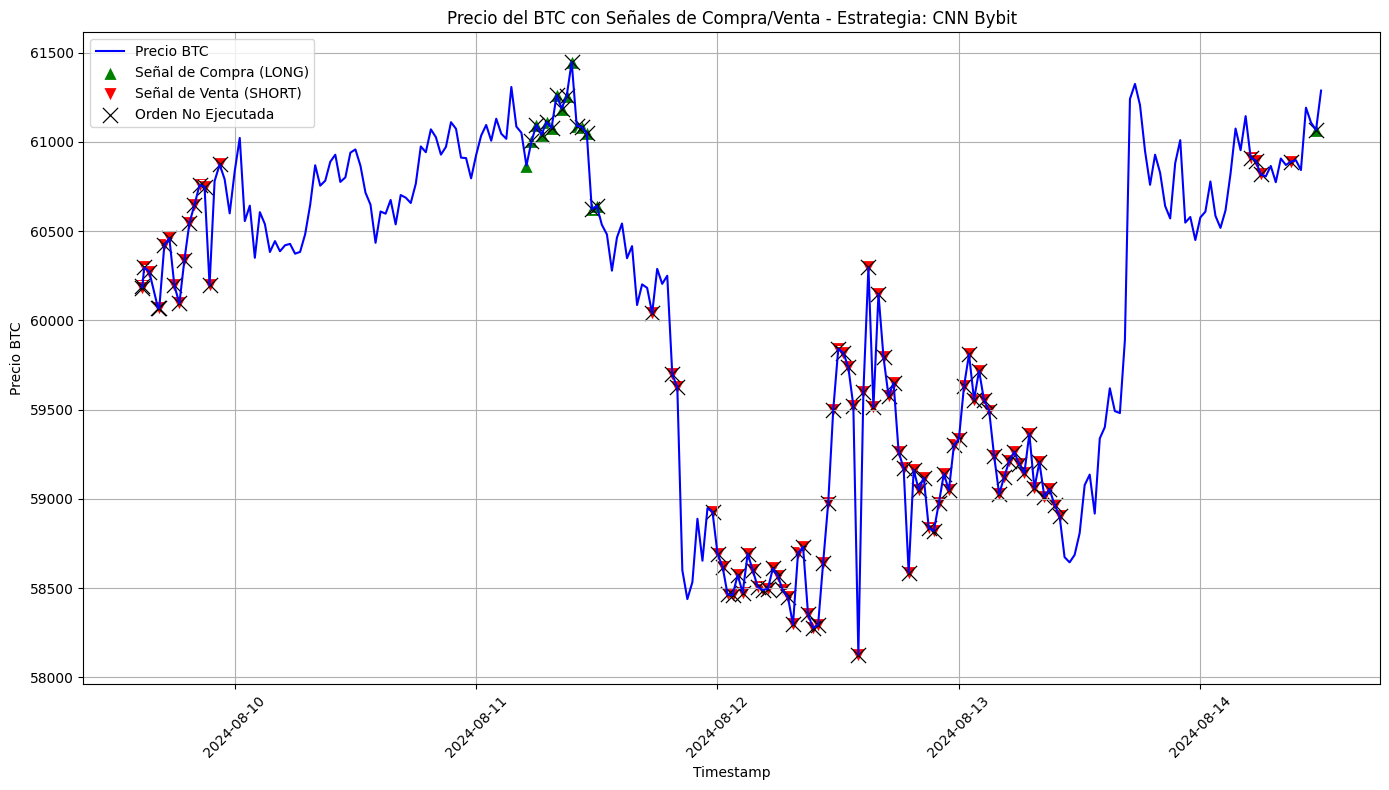

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtra el DataFrame por estrategia (puedes cambiar 'your_strategy' por la estrategia deseada)
strategy = 'CNN Bybit'
df_filtered = df_orders[df_orders['algo_strategy'] == strategy]

plt.figure(figsize=(14, 8))

# Gráfico de la línea de precio
sns.lineplot(x='timestamp', y='price_taken', data=df_filtered, label='Precio BTC', color='blue')

# Añadir puntos para las señales de compra
sns.scatterplot(
    x='timestamp', y='price_taken',
    data=df_filtered[df_filtered['order_type'] == 'LONG'],
    color='green', marker='^', s=100, label='Señal de Compra (LONG)'
)

# Añadir puntos para las señales de venta
sns.scatterplot(
    x='timestamp', y='price_taken',
    data=df_filtered[df_filtered['order_type'] == 'SHORT'],
    color='red', marker='v', s=100, label='Señal de Venta (SHORT)'
)

# Añadir puntos para las órdenes ejecutadas
sns.scatterplot(
    x='timestamp', y='price_taken',
    data=df_filtered[df_filtered['order_executed'] == False],
    color='black', marker='x', s=120, label='Orden No Ejecutada'
)

# Configurar el título y etiquetas
plt.title(f'Precio del BTC con Señales de Compra/Venta - Estrategia: {strategy}')
plt.xlabel('Timestamp')
plt.ylabel('Precio BTC')
plt.legend()
plt.grid(True)

# Rotar etiquetas de fecha si es necesario
plt.xticks(rotation=45)

# Muestra el gráfico
plt.tight_layout()
plt.show()



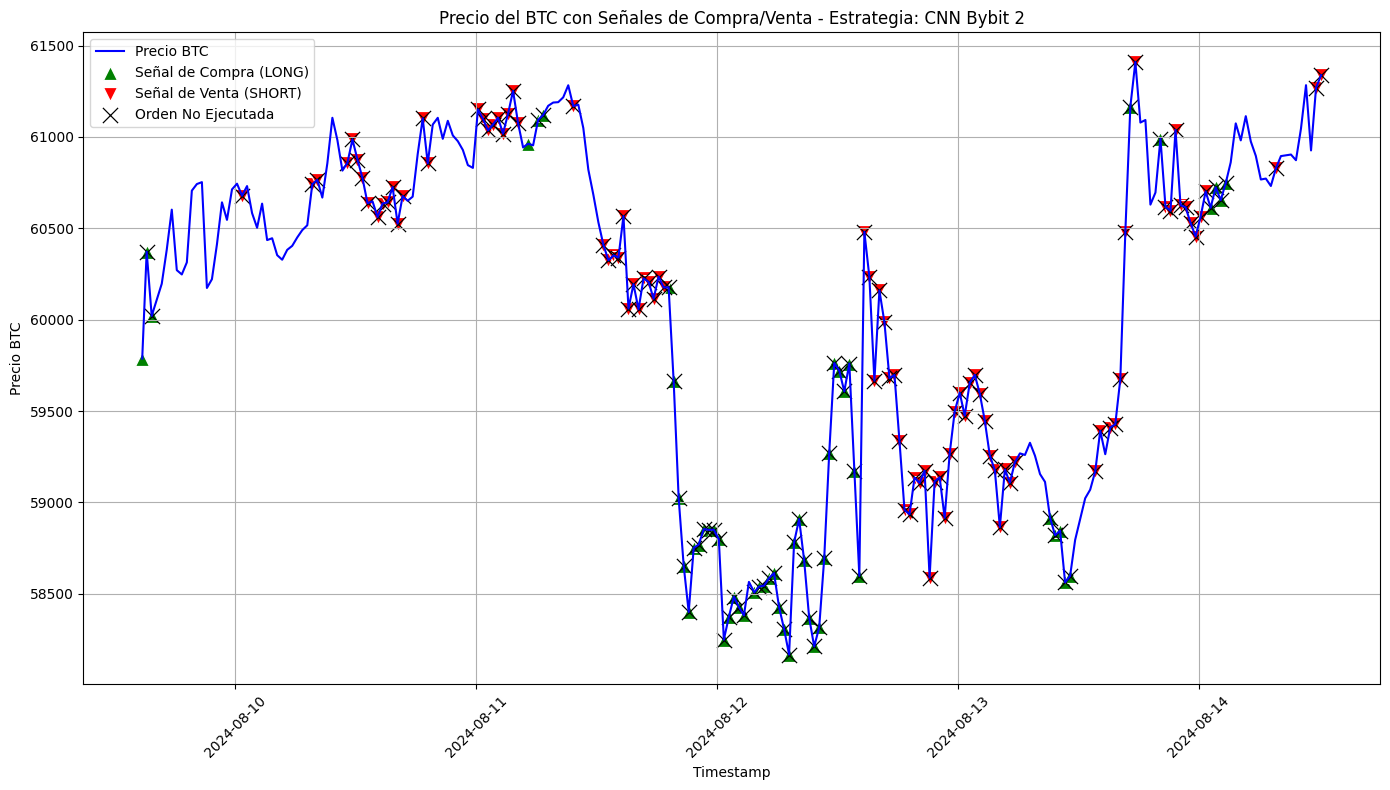

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtra el DataFrame por estrategia (puedes cambiar 'your_strategy' por la estrategia deseada)
strategy = 'CNN Bybit 2'
df_filtered = df_orders[df_orders['algo_strategy'] == strategy]

plt.figure(figsize=(14, 8))

# Gráfico de la línea de precio
sns.lineplot(x='timestamp', y='price_taken', data=df_filtered, label='Precio BTC', color='blue')

# Añadir puntos para las señales de compra
sns.scatterplot(
    x='timestamp', y='price_taken',
    data=df_filtered[df_filtered['order_type'] == 'LONG'],
    color='green', marker='^', s=100, label='Señal de Compra (LONG)'
)

# Añadir puntos para las señales de venta
sns.scatterplot(
    x='timestamp', y='price_taken',
    data=df_filtered[df_filtered['order_type'] == 'SHORT'],
    color='red', marker='v', s=100, label='Señal de Venta (SHORT)'
)

# Añadir puntos para las órdenes ejecutadas
sns.scatterplot(
    x='timestamp', y='price_taken',
    data=df_filtered[df_filtered['order_executed'] == False],
    color='black', marker='x', s=120, label='Orden No Ejecutada'
)

# Configurar el título y etiquetas
plt.title(f'Precio del BTC con Señales de Compra/Venta - Estrategia: {strategy}')
plt.xlabel('Timestamp')
plt.ylabel('Precio BTC')
plt.legend()
plt.grid(True)

# Rotar etiquetas de fecha si es necesario
plt.xticks(rotation=45)

# Muestra el gráfico
plt.tight_layout()
plt.show()



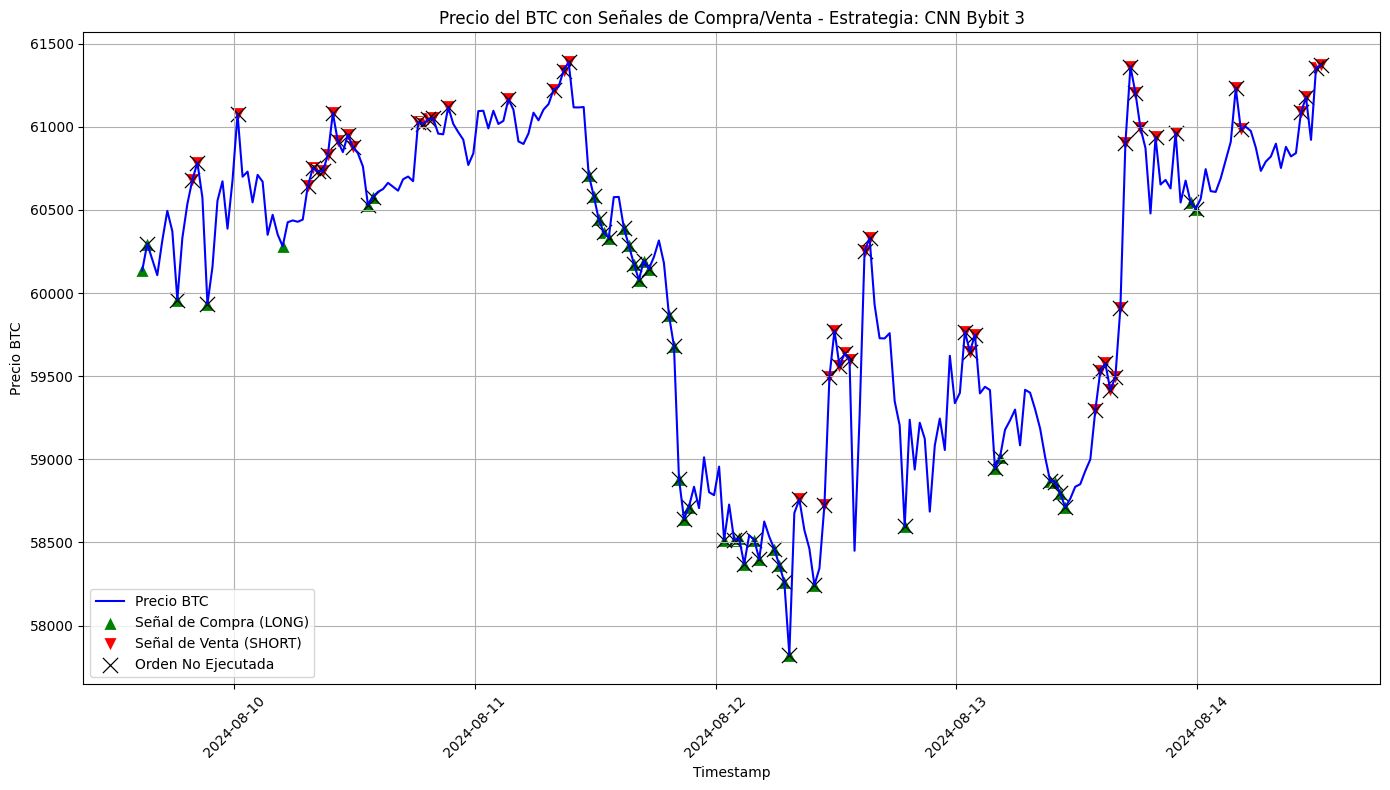

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtra el DataFrame por estrategia (puedes cambiar 'your_strategy' por la estrategia deseada)
strategy = 'CNN Bybit 3'
df_filtered = df_orders[df_orders['algo_strategy'] == strategy]

plt.figure(figsize=(14, 8))

# Gráfico de la línea de precio
sns.lineplot(x='timestamp', y='price_taken', data=df_filtered, label='Precio BTC', color='blue')

# Añadir puntos para las señales de compra
sns.scatterplot(
    x='timestamp', y='price_taken',
    data=df_filtered[df_filtered['order_type'] == 'LONG'],
    color='green', marker='^', s=100, label='Señal de Compra (LONG)'
)

# Añadir puntos para las señales de venta
sns.scatterplot(
    x='timestamp', y='price_taken',
    data=df_filtered[df_filtered['order_type'] == 'SHORT'],
    color='red', marker='v', s=100, label='Señal de Venta (SHORT)'
)

# Añadir puntos para las órdenes ejecutadas
sns.scatterplot(
    x='timestamp', y='price_taken',
    data=df_filtered[df_filtered['order_executed'] == False],
    color='black', marker='x', s=120, label='Orden No Ejecutada'
)

# Configurar el título y etiquetas
plt.title(f'Precio del BTC con Señales de Compra/Venta - Estrategia: {strategy}')
plt.xlabel('Timestamp')
plt.ylabel('Precio BTC')
plt.legend()
plt.grid(True)

# Rotar etiquetas de fecha si es necesario
plt.xticks(rotation=45)

# Muestra el gráfico
plt.tight_layout()
plt.show()



In [9]:
import plotly.graph_objects as go

# Filtra el DataFrame por estrategia (puedes cambiar 'CNN Bybit 3' por otra estrategia)
strategy = 'CNN Bybit 3'
df_filtered = df_orders[df_orders['algo_strategy'] == strategy]

# Crea el gráfico de líneas para el precio del BTC
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_filtered['timestamp'],
    y=df_filtered['price_taken'],
    mode='lines',
    name='Precio BTC',
    line=dict(color='blue')
))

# Añadir puntos para las señales de compra (LONG)
fig.add_trace(go.Scatter(
    x=df_filtered[df_filtered['order_type'] == 'LONG']['timestamp'],
    y=df_filtered[df_filtered['order_type'] == 'LONG']['price_taken'],
    mode='markers',
    name='Señal de Compra (LONG)',
    marker=dict(color='green', size=10, symbol='triangle-up')
))

# Añadir puntos para las señales de venta (SHORT)
fig.add_trace(go.Scatter(
    x=df_filtered[df_filtered['order_type'] == 'SHORT']['timestamp'],
    y=df_filtered[df_filtered['order_type'] == 'SHORT']['price_taken'],
    mode='markers',
    name='Señal de Venta (SHORT)',
    marker=dict(color='red', size=10, symbol='triangle-down')
))

# Añadir puntos para las órdenes no ejecutadas (order_executed = False)
fig.add_trace(go.Scatter(
    x=df_filtered[df_filtered['order_executed'] == False]['timestamp'],
    y=df_filtered[df_filtered['order_executed'] == False]['price_taken'],
    mode='markers',
    name='Orden No Ejecutada',
    marker=dict(color='black', size=12, symbol='x')
))

# Configurar el layout del gráfico
fig.update_layout(
    title=f'Precio del BTC con Señales de Compra/Venta - Estrategia: {strategy}',
    xaxis_title='Timestamp',
    yaxis_title='Precio BTC',
    hovermode='x unified',
    legend=dict(x=0, y=1),
    template='plotly_white',
    xaxis=dict(showgrid=True, zeroline=False, showline=True),
    yaxis=dict(showgrid=True, zeroline=False, showline=True),
    width=1000,
    height=600
)

# Muestra el gráfico
fig.show()
